<a href="https://colab.research.google.com/github/vicotrbb/data_science/blob/master/projects/yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 4.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=eeac8bbeccb56b4c4b111675440d00c722744c1e117f151ed9728df9bcc4689f
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install statsmodels

In [ ]:
import yfinance as yf
yf.pdr_override()

ticker_indicators = yf.Ticker("MSFT")
ticker_data = pdr.get_data_yahoo("MSFT")

[*********************100%***********************]  1 of 1 completed


In [ ]:
from pandas_datareader import data as pdr
import pandas as pd

In [ ]:
ticker_indicators.info

In [ ]:
df = ticker_indicators.history(period='1d', interval="1m")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-05-07 09:30:00-04:00,251.850006,251.850006,251.660004,251.800003,1581179,0,0
2021-05-07 09:31:00-04:00,251.770004,251.830002,251.389999,251.550003,97628,0,0
2021-05-07 09:32:00-04:00,251.570007,251.740005,251.339996,251.505005,128051,0,0
2021-05-07 09:33:00-04:00,251.485001,251.729996,251.300003,251.570007,95727,0,0
2021-05-07 09:34:00-04:00,251.570007,251.639999,251.169998,251.449997,89753,0,0
...,...,...,...,...,...,...,...
2021-05-07 15:55:00-04:00,252.740005,252.869995,252.710007,252.789993,101844,0,0
2021-05-07 15:56:00-04:00,252.800003,252.809998,252.490005,252.600006,106881,0,0
2021-05-07 15:57:00-04:00,252.610001,252.830002,252.610001,252.794998,80800,0,0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Stocks predictor

In [ ]:
google = yf.Ticker('GOOG')
df = google.history(period='1d', interval="1m")
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)

In [ ]:
google.info

In [ ]:
df.head()

,Low
date,
09:30:00,2370.510010
09:31:00,2368.889893
09:32:00,2366.145020
09:33:00,2362.000000
09:34:00,2356.659912


In [ ]:
X = df.index.values
y = df['Low'].values

offset = int(0.10*len(df))

X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

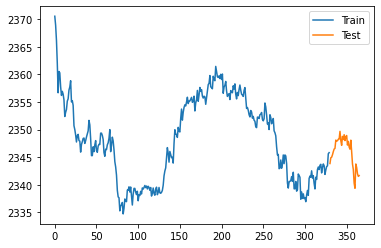

In [ ]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [ ]:
model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

In [ ]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 2345.820068359375
Real data for time 1: 2343.85009765625
Pred data for time 1: [2345.69042077]


In [ ]:
y_test

array([2343.85009766, 2344.89501953, 2344.99511719, 2345.42993164,
       2346.        , 2346.4699707 , 2346.59008789, 2348.09008789,
       2347.92993164, 2347.97241211, 2348.25      , 2348.27490234,
       2349.66992188, 2348.01000977, 2347.13989258, 2348.76000977,
       2348.19995117, 2349.07006836, 2348.        , 2348.70996094,
       2348.91992188, 2347.18994141, 2347.86010742, 2346.83007812,
       2346.44995117, 2348.08007812, 2346.02001953, 2343.77001953,
       2342.76000977, 2340.29003906, 2339.37011719, 2343.77001953,
       2343.12988281, 2341.98999023, 2341.5300293 , 2341.65991211])

In [ ]:
pred_test = model.forecast(steps=100)

In [ ]:
pred_test[0]

array([2345.69042077, 2346.00955553, 2346.12348981, 2346.12613607,
       2346.21788337, 2346.28452322, 2346.33588649, 2346.39161824,
       2346.4533875 , 2346.50493442, 2346.56232237, 2346.61521401,
       2346.67096504, 2346.72264465, 2346.77726689, 2346.82829952,
       2346.88152405, 2346.9318494 , 2346.98386774, 2347.03341437,
       2347.08427313, 2347.13303952, 2347.18278956, 2347.23075735,
       2347.27944867, 2347.32660948, 2347.37428266, 2347.42063289,
       2347.46732474, 2347.51286396, 2347.55860729, 2347.60333814,
       2347.64816247, 2347.69208991, 2347.73602206, 2347.77915286,
       2347.82221743, 2347.86455981, 2347.90677949, 2347.94834279,
       2347.98973871, 2348.03053313, 2348.07112506, 2348.11116147,
       2348.15096803, 2348.19025779, 2348.22929663, 2348.26785143,
       2348.30613937, 2348.34397114, 2348.38152425, 2348.41864507,
       2348.45547879, 2348.49190083, 2348.52803002, 2348.56376543,
       2348.59920445, 2348.6342654 , 2348.66902815, 2348.70342

In [ ]:
print(f'Real data for time 0-10: {y_test[0:10]}')
print(f'Pred data for time 0-10: {pred_test[0]}')

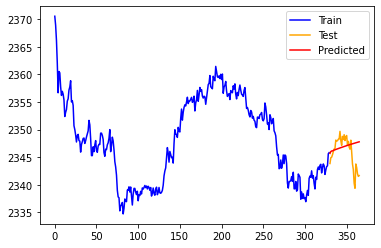

In [ ]:
plt.plot(range(0,len(y_train)),y_train, label='Train', c='blue')
plt.plot(range(len(y_train),len(y)),y_test,label='Test', c='orange')
plt.plot(range(len(y_train),len(y_train) + len(pred_test[0][0:len(y_test)])),pred_test[0][0:len(y_test)],label='Predicted', c='red')
plt.legend()
plt.show()

In [ ]:
google = yf.Ticker('WEGE3.SA')
df = google.history(period='1d', interval="1m")
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)

In [ ]:
X = df.index.values
y = df['Low'].values

offset = int(0.10*len(df))

X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.predict(dynamic=True)

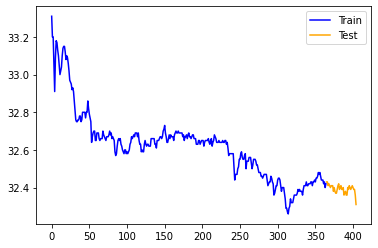

In [ ]:
plt.plot(range(0,len(y_train)),y_train, label='Train', c='blue')
plt.plot(range(len(y_train),len(y)),y_test,label='Test', c='orange')
plt.legend()
plt.show()